<a href="https://colab.research.google.com/github/NguyenSLam/Artificial-Intelligence/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
test_images.shape

(10000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_labels.shape

(10000,)

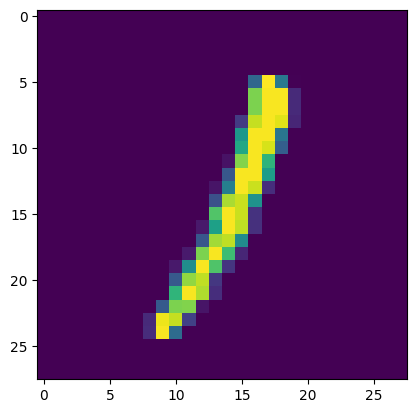

so nay la:  1


In [6]:
degit = train_images[99]
import matplotlib.pyplot as plt
plt.imshow(degit)
plt.show()
print('so nay la: ',train_labels[99])

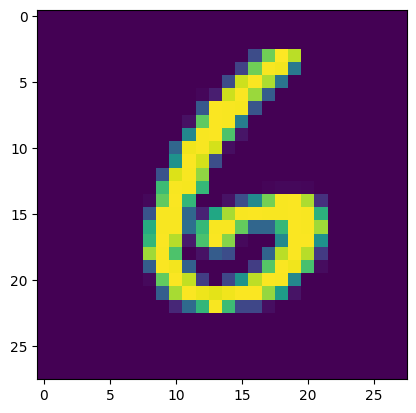

so nay la:  6


In [7]:
degit = train_images[6000]
import matplotlib.pyplot as plt
plt.imshow(degit)
plt.show()
print('so nay la: ',train_labels[6000])

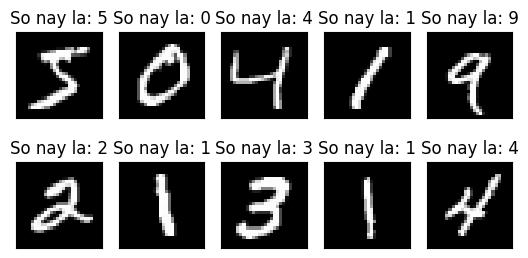

In [8]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So nay la: {}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

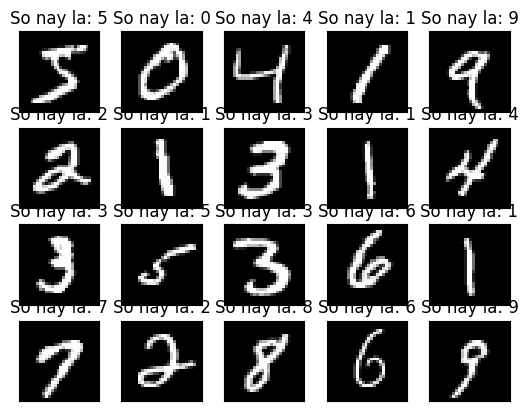

In [9]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So nay la: {}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

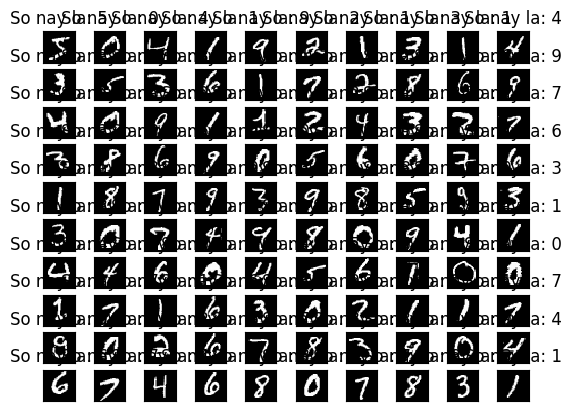

In [10]:
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.tight_layout
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So nay la: {}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [11]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()#ANN
model.add(Dense(512,activation = 'relu',input_shape =(28*28,)))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

In [13]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [14]:
#Onehot encoding convert
from keras.utils import to_categorical

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

x=test_images
y=test_labels

In [15]:
#Data -> Model -> Compile -> Train -> experiense

In [16]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20, batch_size=128)
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Do mat mat: ',test_loss)
print('Do chinh xac: ',test_acc)

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2634 - accuracy: 0.9249
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1061 - accuracy: 0.9687
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0695 - accuracy: 0.9790
Epoch 4/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0505 - accuracy: 0.9847
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0385 - accuracy: 0.9882
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0287 - accuracy: 0.9918
Epoch 7/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0216 - accuracy: 0.9940
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0166 - accuracy: 0.9955
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0123 - accuracy: 0.9968
Epoch 10/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0088 - accuracy: 0

In [17]:
model.save('MINIST.h5')

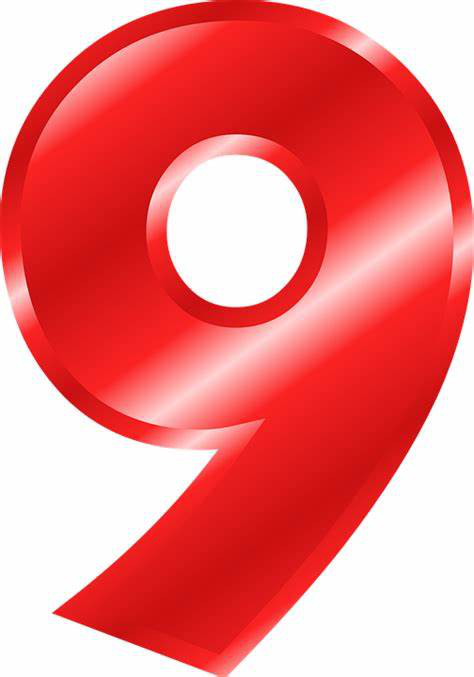

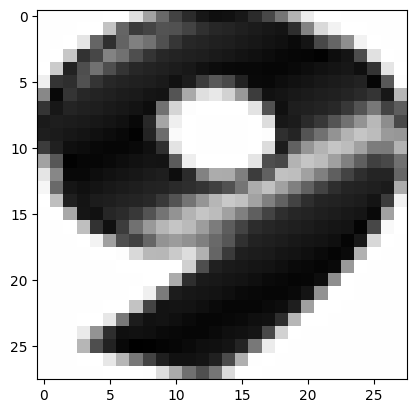

1/1 [==============================] - 0s 119ms/step
Predicted digit: 8


In [18]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np
from PIL import Image
from keras.models import load_model
from IPython.display import display

#Load model
model = load_model('MINIST.h5')

#Open image uploaded 
img = Image.open('9.jpg')

#Display image uploaded
display(img)

#Convert to gray Image
img = img.convert('L')

#Resize to 28x28 image
img = img.resize((28,28))

#Show image
plt.imshow(img, cmap= 'gray', interpolation= 'none')
plt.show()

#Convert image to numpy array
img = np.array(img)

#Reshape array to Vector(1, 28*28)
img = img.reshape(1,28*28)

#Rescale pixel value from (0, 255) to (0, 1)
img = img.astype('float32') / 255

#Prediction and displaying the result on the screen
predictions = model.predict(img)
digit = np.argmax(predictions)
print('Predicted digit:', digit)